### Trabajo Modulo 2

Llegamos al final del modulo 2 y estamos en condiciones de analizar un dataset, entrenar un primer modelo (en este caso de clasificacion) y evaluar resultados.

En este proyecto trabajaran con un dataset que contiene informacion sobre personas, el objetivo es crear un modelo que permita predecir si la persona es fumadora o no.

Podran acceder al conjunto de datos en el siguiente enlace: https://docs.google.com/spreadsheets/d/1335AaFI1WufJkv56b9u-JwdLKifenolp/edit?usp=sharing&ouid=107760286087613309815&rtpof=true&sd=true

### Entrega

Deberan adjuntar una notebook tipo "informe" donde se incluya: carga de datos, limpieza y manipulacion de los mismos, EDA, feature selection, entrenamiento y evaluacion de modelos, conclusiones.

Tambien deberan descargar los siguientes datos: https://docs.google.com/spreadsheets/d/1dpTMd0R0-YJ6psx8egWNR-IL5g6QPraL/edit?usp=sharing&ouid=107760286087613309815&rtpof=true&sd=true


Y realizar una prediccion con el que consideren su mejor modelo y adjuntarlas incluyendo dicha prediccion en una variable nueva al final del dataset llamada "Smoking".


Solucion de TP

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv("smoking_prediction.xlsx - smoking_prediction.csv")
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,3.38,0.04,0.04,0.04,0.04,...,0.51,0.04,0.00,0.75,0.79,1.13,Y,0,Y,0
1,1,F,40,160,60,3.38,0.01,0.00,0.04,0.04,...,0.50,0.04,0.00,0.92,0.79,0.75,Y,0,Y,0
2,2,M,55,170,60,3.33,0.01,0.01,0.04,0.04,...,0.63,0.04,0.04,0.88,0.67,0.92,Y,0,N,1
3,3,M,40,165,70,3.67,0.05,0.05,0.04,0.04,...,0.59,0.04,0.04,0.79,1.08,0.75,Y,0,Y,0
4,4,F,40,155,60,3.58,0.04,0.04,0.04,0.04,...,0.50,0.04,0.00,0.67,0.58,0.92,Y,0,N,0


In [82]:
df.shape

(50000, 27)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   50000 non-null  int64  
 1   gender               50000 non-null  object 
 2   age                  50000 non-null  int64  
 3   height(cm)           50000 non-null  int64  
 4   weight(kg)           50000 non-null  int64  
 5   waist(cm)            50000 non-null  float64
 6   eyesight(left)       50000 non-null  float64
 7   eyesight(right)      50000 non-null  float64
 8   hearing(left)        50000 non-null  float64
 9   hearing(right)       50000 non-null  float64
 10  systolic             50000 non-null  float64
 11  relaxation           50000 non-null  float64
 12  fasting blood sugar  50000 non-null  float64
 13  Cholesterol          50000 non-null  float64
 14  triglyceride         50000 non-null  float64
 15  HDL                  50000 non-null 

In [84]:
##Chequeo de valores nulos
df.isna().sum()/df.shape[0]*100

ID                     0.0
gender                 0.0
age                    0.0
height(cm)             0.0
weight(kg)             0.0
waist(cm)              0.0
eyesight(left)         0.0
eyesight(right)        0.0
hearing(left)          0.0
hearing(right)         0.0
systolic               0.0
relaxation             0.0
fasting blood sugar    0.0
Cholesterol            0.0
triglyceride           0.0
HDL                    0.0
LDL                    0.0
hemoglobin             0.0
Urine protein          0.0
serum creatinine       0.0
AST                    0.0
ALT                    0.0
Gtp                    0.0
oral                   0.0
dental caries          0.0
tartar                 0.0
smoking                0.0
dtype: float64

In [85]:
df.describe()
df.smoking.value_counts(normalize=True)*100

smoking
0    63.342
1    36.658
Name: proportion, dtype: float64

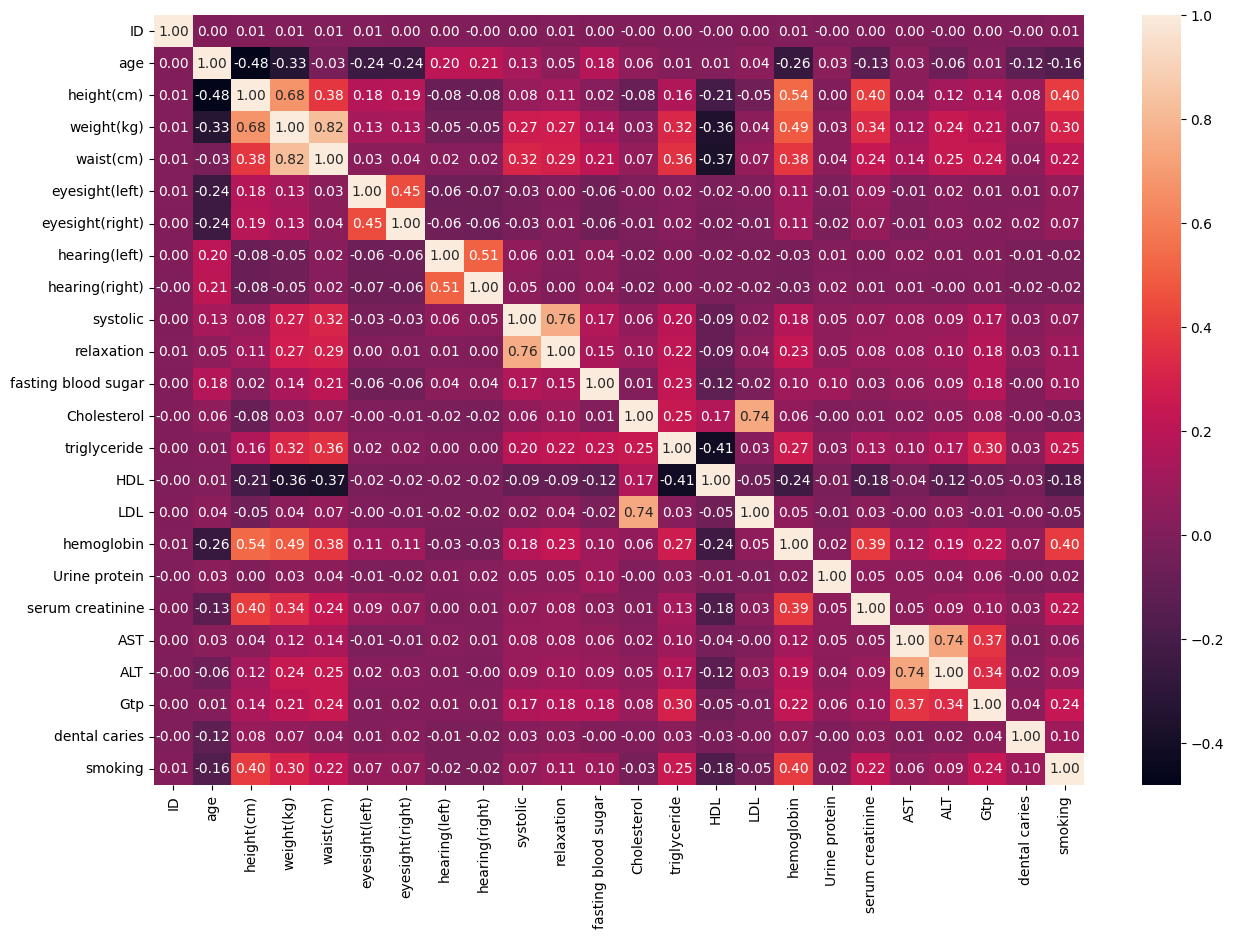

In [86]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True, fmt=".2f")
plt.show()

In [87]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [88]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,26284.994580,44.189300,164.652000,65.878700,3.415468,0.027999,0.027865,0.041026,0.041048,5.063196,...,2.388346,4.791527,0.594483,0.043708,0.018538,1.094032,1.130193,1.668978,0.213120,0.366580
std,16015.070567,12.090086,9.208778,12.831355,0.386760,0.024137,0.024297,0.006325,0.006389,0.570171,...,0.615541,1.709246,0.066414,0.017509,0.017504,0.828010,1.327440,2.110348,0.409516,0.481875
min,0.000000,20.000000,130.000000,30.000000,2.130000,0.000000,0.000000,0.040000,0.040000,2.960000,...,0.170000,0.040000,0.170000,0.040000,0.000000,0.250000,0.040000,0.040000,0.000000,0.000000
25%,12499.750000,40.000000,160.000000,55.000000,3.170000,0.010000,0.010000,0.040000,0.040000,4.670000,...,1.960000,3.830000,0.550000,0.040000,0.010000,0.790000,0.630000,0.710000,0.000000,0.000000
50%,24999.500000,40.000000,165.000000,65.000000,3.420000,0.040000,0.040000,0.040000,0.040000,5.000000,...,2.290000,4.710000,0.590000,0.040000,0.010000,0.960000,0.880000,1.040000,0.000000,0.000000
75%,40034.250000,55.000000,170.000000,75.000000,3.670000,0.040000,0.040000,0.040000,0.040000,5.420000,...,2.750000,5.670000,0.630000,0.040000,0.040000,1.210000,1.290000,1.830000,0.000000,1.000000
max,55690.000000,85.000000,190.000000,135.000000,5.380000,0.380000,0.380000,0.080000,0.080000,10.000000,...,25.750000,77.500000,0.880000,0.250000,0.460000,54.630000,121.420000,41.630000,1.000000,1.000000


In [89]:
df.smoking.value_counts(normalize=True)*100


smoking
0    63.342
1    36.658
Name: proportion, dtype: float64

In [90]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

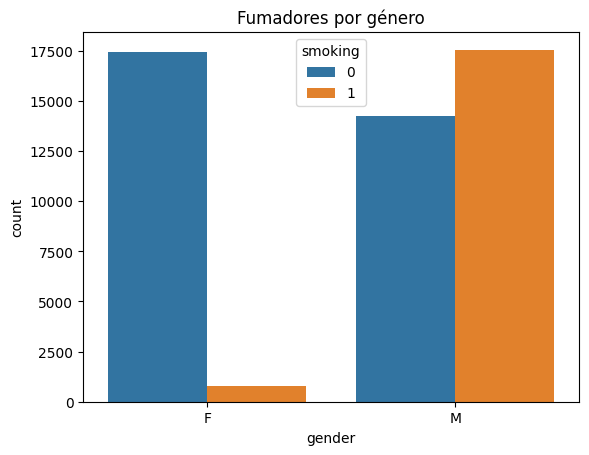

In [91]:
#Hipotesis: Fumar varia con el sexo

sns.countplot(x="gender", hue="smoking", data=df)
plt.title("Fumadores por género")
plt.show()


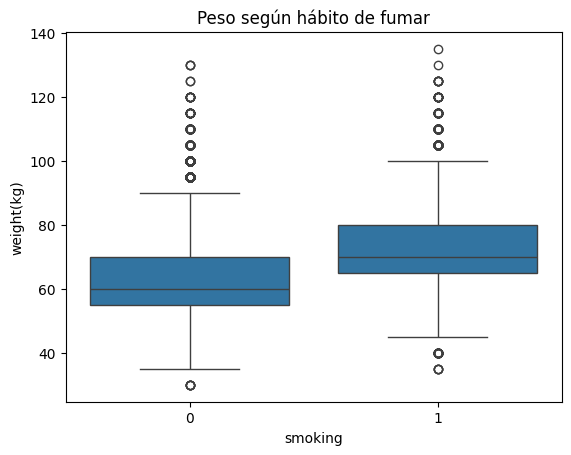

In [92]:
#Hipotesis: Fumadores tienen menor peso

sns.boxplot(x="smoking", y="weight(kg)", data=df)
plt.title("Peso según hábito de fumar")
plt.show()

#No parece haber una diferencia significativa en el peso entre fumadores y no fumadores.

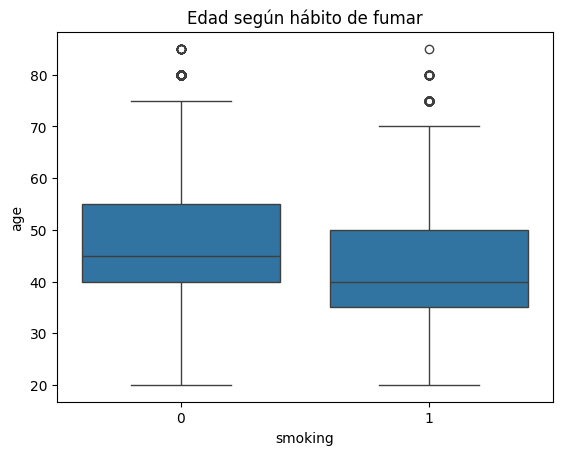

In [93]:
#Hipotesis: Fumar varia con la edad

sns.boxplot(x="smoking", y="age", data=df)
plt.title("Edad según hábito de fumar") 
plt.show()

#No parece haber una diferencia significativa en la edad entre fumadores y no fumadores.

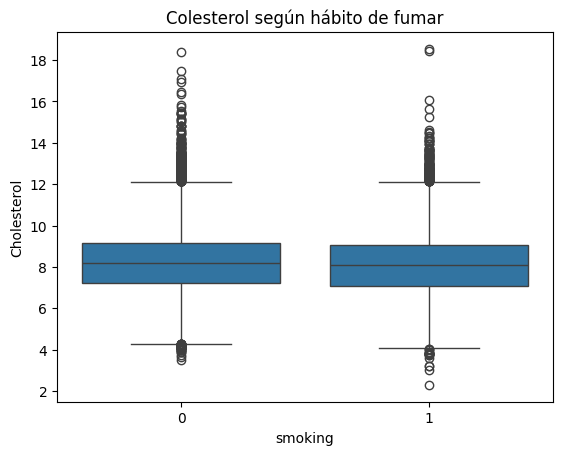

In [94]:
#Hipotesis: Fumadores tienen colesterol distinto

sns.boxplot(x="smoking", y="Cholesterol", data=df)
plt.title("Colesterol según hábito de fumar")  
plt.show()
#No parece haber una diferencia significativa en el colesterol entre fumadores y no fumadores.

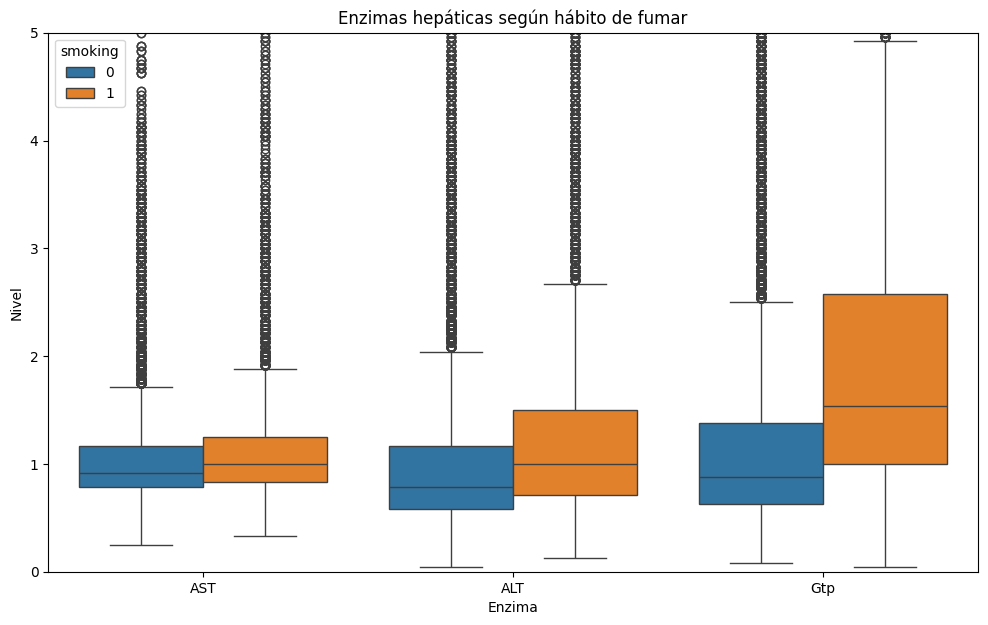

In [95]:
#Hipostesis: Fumar se asocia con mayor GTP/ALT

enzimas = ["AST", "ALT", "Gtp"]
df_long = df.melt(id_vars="smoking", value_vars=enzimas,
                  var_name="Enzima", value_name="Nivel")

plt.figure(figsize=(12,7)) 
sns.boxplot(x="Enzima", y="Nivel", hue="smoking", data=df_long)
plt.title("Enzimas hepáticas según hábito de fumar")
plt.ylim(0, 5)
plt.show()


In [96]:
#Elimino columna oral porqe siempre tiene el mismo valor

df = df.drop(columns=["oral"])

In [97]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   50000 non-null  int64  
 1   gender               50000 non-null  object 
 2   age                  50000 non-null  int64  
 3   height(cm)           50000 non-null  int64  
 4   weight(kg)           50000 non-null  int64  
 5   waist(cm)            50000 non-null  float64
 6   eyesight(left)       50000 non-null  float64
 7   eyesight(right)      50000 non-null  float64
 8   hearing(left)        50000 non-null  float64
 9   hearing(right)       50000 non-null  float64
 10  systolic             50000 non-null  float64
 11  relaxation           50000 non-null  float64
 12  fasting blood sugar  50000 non-null  float64
 13  Cholesterol          50000 non-null  float64
 14  triglyceride         50000 non-null  float64
 15  HDL                  50000 non-null 

In [98]:
#Codificacion

X = df.drop("smoking", axis=1).copy()
y = df.smoking.copy()

In [99]:
#Dividir los datos

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [100]:
y_train.value_counts(normalize=True)

smoking
0    0.633429
1    0.366571
Name: proportion, dtype: float64

In [101]:
y_test.value_counts(normalize=True)

smoking
0    0.6334
1    0.3666
Name: proportion, dtype: float64

In [102]:
#Codificar con train

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False).fit(X_train[["gender", "tartar"]])
encoded = ohe.transform((X_train[["gender", "tartar"]]))
encoded_df = pd.DataFrame(columns=ohe.get_feature_names_out(), data = encoded, index=X_train.index)
X_train = pd.concat([X_train, encoded_df], axis="columns")
X_train = X_train.drop(["gender", "tartar"], axis=1)

In [103]:
X_train

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,gender_F,gender_M,tartar_N,tartar_Y
8319,10448,55,165,65,3.54,0.00,0.04,0.04,0.04,5.46,...,0.04,0.04,1.00,1.13,2.04,0,0.0,1.0,1.0,0.0
7833,9846,60,155,55,3.25,0.01,0.00,0.04,0.04,4.38,...,0.04,0.01,1.21,1.13,3.17,0,1.0,0.0,1.0,0.0
27390,34168,55,150,50,3.09,0.05,0.04,0.04,0.04,4.92,...,0.04,0.00,1.50,1.29,1.71,1,1.0,0.0,0.0,1.0
44413,55525,40,165,65,3.13,0.04,0.04,0.04,0.04,5.21,...,0.04,0.04,0.79,0.79,1.08,1,0.0,1.0,0.0,1.0
24218,30246,40,160,50,2.92,0.04,0.05,0.04,0.04,4.79,...,0.13,0.00,0.67,0.38,0.33,0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48892,21873,40,155,65,3.42,0.04,0.04,0.04,0.04,5.38,...,0.04,0.00,0.75,0.50,0.88,0,1.0,0.0,0.0,1.0
25727,32144,55,155,50,3.25,0.00,0.00,0.04,0.04,4.92,...,0.04,0.04,0.88,0.63,0.96,0,1.0,0.0,1.0,0.0
18911,23606,75,160,55,3.42,0.01,0.04,0.04,0.04,4.67,...,0.04,0.04,1.29,0.96,1.21,0,0.0,1.0,1.0,0.0
25680,32085,40,150,45,3.00,0.04,0.00,0.04,0.04,4.67,...,0.04,0.00,0.88,0.92,0.67,0,1.0,0.0,1.0,0.0


In [104]:
#Test
#Uso One Hot Encoder porque se necesitan que todas las variables sean numéricas, pero además no entienden el orden implícito de las categorías.
encoded_test = ohe.transform((X_test[["gender", "tartar"]]))
encoded_test_df = pd.DataFrame(columns=ohe.get_feature_names_out(), data = encoded_test, index=X_test.index)
X_test = pd.concat([X_test, encoded_test_df], axis="columns")
X_test = X_test.drop(["gender", "tartar"], axis=1)
X_train.shape
 

(35000, 27)

In [105]:
X_test.shape 

(15000, 27)

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35000 entries, 8319 to 43737
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   35000 non-null  int64  
 1   age                  35000 non-null  int64  
 2   height(cm)           35000 non-null  int64  
 3   weight(kg)           35000 non-null  int64  
 4   waist(cm)            35000 non-null  float64
 5   eyesight(left)       35000 non-null  float64
 6   eyesight(right)      35000 non-null  float64
 7   hearing(left)        35000 non-null  float64
 8   hearing(right)       35000 non-null  float64
 9   systolic             35000 non-null  float64
 10  relaxation           35000 non-null  float64
 11  fasting blood sugar  35000 non-null  float64
 12  Cholesterol          35000 non-null  float64
 13  triglyceride         35000 non-null  float64
 14  HDL                  35000 non-null  float64
 15  LDL                  35000 non-null  f

In [107]:
#Entrenamiento del modelo

In [108]:
#Arbol de decisión
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3,random_state=42)
dtc.fit(X_train, y_train)
train_pred_dtc = dtc.predict(X_train)
test_pred_dtc = dtc.predict(X_test)



In [109]:
from sklearn.metrics import classification_report, confusion_matrix

print("Reporte de clasificación - Árbol de Decisión Train")       
print(classification_report(y_train, train_pred_dtc))
cm_dtc = confusion_matrix(y_train, train_pred_dtc)
cm_dtc
print("Reporte de clasificación - Árbol de Decisión Test")       
print(classification_report(y_test, test_pred_dtc))
cm_dtc = confusion_matrix(y_test, test_pred_dtc)
cm_dtc




Reporte de clasificación - Árbol de Decisión Train
              precision    recall  f1-score   support

           0       0.81      0.75      0.78     22170
           1       0.62      0.70      0.66     12830

    accuracy                           0.73     35000
   macro avg       0.72      0.72      0.72     35000
weighted avg       0.74      0.73      0.74     35000

Reporte de clasificación - Árbol de Decisión Test
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      9501
           1       0.62      0.69      0.65      5499

    accuracy                           0.73     15000
   macro avg       0.71      0.72      0.71     15000
weighted avg       0.74      0.73      0.73     15000



array([[7147, 2354],
       [1728, 3771]])

In [110]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=20, min_samples_split=10, min_samples_leaf=50, random_state=42)
rfc.fit(X_train, y_train)
train_pred_rfc = rfc.predict(X_train)
test_pred_rfc = rfc.predict(X_test)


In [111]:
from sklearn.metrics import classification_report, confusion_matrix
print("Reporte de clasificación - Random Forest Train")
print(classification_report(y_train, train_pred_rfc))
cm_rfc = confusion_matrix(y_train, train_pred_rfc)
cm_rfc

print("Reporte de clasificación - Random Forest Test")
print(classification_report(y_test, test_pred_rfc))
cm_rfc = confusion_matrix(y_test, test_pred_rfc)
cm_rfc

Reporte de clasificación - Random Forest Train
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     22170
           1       0.69      0.76      0.73     12830

    accuracy                           0.79     35000
   macro avg       0.77      0.78      0.78     35000
weighted avg       0.80      0.79      0.79     35000

Reporte de clasificación - Random Forest Test
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      9501
           1       0.65      0.72      0.69      5499

    accuracy                           0.76     15000
   macro avg       0.74      0.75      0.74     15000
weighted avg       0.76      0.76      0.76     15000



array([[7399, 2102],
       [1530, 3969]])

In [112]:
#xgboost
import xgboost as xgb   
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
pred_train_xgb = xgb_clf.predict(X_train)
pred_test_xgb = xgb_clf.predict(X_test)



In [113]:
from sklearn.metrics import classification_report, confusion_matrix

print("Reporte de clasificación - XGBoost Train")
print(classification_report(y_train, pred_train_xgb))
cm_xgb = confusion_matrix(y_train, pred_train_xgb)
cm_xgb

print("Reporte de clasificación - XGBoost Test")
print(classification_report(y_test, pred_test_xgb))
cm_xgb = confusion_matrix(y_test, pred_test_xgb)
cm_xgb


Reporte de clasificación - XGBoost Train
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     22170
           1       0.82      0.84      0.83     12830

    accuracy                           0.87     35000
   macro avg       0.86      0.87      0.87     35000
weighted avg       0.87      0.87      0.87     35000

Reporte de clasificación - XGBoost Test


              precision    recall  f1-score   support

           0       0.82      0.80      0.81      9501
           1       0.67      0.70      0.68      5499

    accuracy                           0.76     15000
   macro avg       0.75      0.75      0.75     15000
weighted avg       0.77      0.76      0.76     15000



array([[7627, 1874],
       [1673, 3826]])

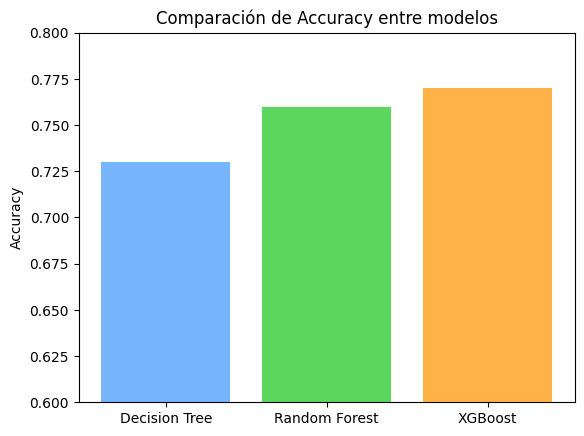

In [114]:
import matplotlib.pyplot as plt

modelos = ["Decision Tree", "Random Forest", "XGBoost"]
accuracy = [0.73, 0.76, 0.77]

plt.bar(modelos, accuracy, color=["#77b5fe", "#5cd65c", "#ffb347"])
plt.title("Comparación de Accuracy entre modelos")
plt.ylabel("Accuracy")
plt.ylim(0.6, 0.8)
plt.show()

In [115]:
#Intento mejorar XGBoost
#Con max_depth = 6 produce overfitting, si bajo el max_depth: Árboles más superficiales → menos varianza → mejor generalización

xgb_clf = xgb.XGBClassifier(
    random_state=42,
    max_depth=3,
)
xgb_clf.fit(X_train, y_train)
pred_train_xgb = xgb_clf.predict(X_train)
pred_test_xgb = xgb_clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Reporte de clasificación - XGBoost Train")
print(classification_report(y_train, pred_train_xgb))
cm_xgb = confusion_matrix(y_train, pred_train_xgb)
cm_xgb

print("Reporte de clasificación - XGBoost Test")
print(classification_report(y_test, pred_test_xgb))
cm_xgb = confusion_matrix(y_test, pred_test_xgb)
cm_xgb


Reporte de clasificación - XGBoost Train
              precision    recall  f1-score   support

           0       0.84      0.81      0.83     22170
           1       0.70      0.74      0.72     12830

    accuracy                           0.79     35000
   macro avg       0.77      0.77      0.77     35000
weighted avg       0.79      0.79      0.79     35000

Reporte de clasificación - XGBoost Test
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      9501
           1       0.67      0.71      0.69      5499

    accuracy                           0.77     15000
   macro avg       0.75      0.75      0.75     15000
weighted avg       0.77      0.77      0.77     15000



array([[7563, 1938],
       [1573, 3926]])

Se logra reducir el sobreajuste y mantener un rendimiento alto en test.

El nuevo XGBoost está aprendiendo patrones reales del conjunto de datos (no ruido).
Aunque su precisión total no subió respecto al Random Forest, su comportamiento más estable y balanceado lo hace un modelo más confiable para producción o nuevos datos.

Recall (fumadores) = 0.71 → sigue detectando correctamente la mayoría de fumadores.

Precision (fumadores) = 0.67 → mantiene una tasa de falsos positivos razonable.

F1 promedio (0.75) → mejor balance general entre las clases.

* Antes (max_depth=6, learning_rate=0.1)

Train: 0.87

Test: 0.77

Diferencia = 10 puntos → overfitting
(aprendía demasiado del entrenamiento y no generalizaba bien).

* Ahora (max_depth=3, learning_rate=0.05, regularización)

Train: 0.78

Test: 0.76

Diferencia = 2 puntos → modelo equilibrado
Generaliza correctamente sin “memorizar” el dataset.

En conclusión, el modelo XGBoost ajustado se considera la mejor alternativa por su equilibrio entre rendimiento y generalización.

El Árbol de Decisión y el Random Forest sirven como referencias más interpretables, el XGBoost optimizado consigue un 76% de exactitud en test y una F1 media de 0.75, mostrando que la reducción de profundidad y la tasa de aprendizaje más baja fueron efectivas para mitigar el sobreajuste.

Las variables más influyentes fueron Gtp, ALT, peso y edad, lo que coincide con las hipótesis fisiológicas planteadas en el análisis exploratorio inicial.

Predecir dataset nuevo

In [116]:
df_nuevo = pd.read_csv("smoking_prediction_entrega.xlsx - smoking_prediction.csv")
df_nuevo.head()


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,27358,M,25,160,65,3.42,0.05,0.00,0.04,0.04,...,3.04,0.63,0.04,0.01,0.75,0.71,0.71,Y,0,Y
1,27364,M,30,180,80,3.46,0.04,0.01,0.04,0.04,...,4.21,0.59,0.04,0.04,0.79,1.13,1.33,Y,0,N
2,27368,M,55,165,60,3.42,0.00,0.01,0.04,0.04,...,2.04,0.63,0.04,0.01,1.08,1.29,2.00,Y,1,Y
3,27378,M,20,175,75,3.63,0.05,0.05,0.04,0.04,...,3.71,0.63,0.04,0.04,0.83,0.58,0.46,Y,0,N
4,27381,M,25,165,80,3.79,0.04,0.04,0.04,0.04,...,6.63,0.67,0.04,0.04,1.25,1.63,1.96,Y,1,Y


In [117]:
df_nuevo = df_nuevo.drop(columns=["oral"])

In [118]:
# Generar columnas one-hot en el dataset nuevo
encoded_new = ohe.transform(df_nuevo[["gender", "tartar"]])

encoded_new_df = pd.DataFrame(
    encoded_new,
    columns=ohe.get_feature_names_out(),
    index=df_nuevo.index
)

# Concatenar con el dataframe original
df_nuevo_proc = pd.concat([df_nuevo, encoded_new_df], axis=1)

# Eliminar las columnas originales categóricas
df_nuevo_proc = df_nuevo_proc.drop(["gender", "tartar"], axis=1)


In [119]:
df_nuevo_proc = df_nuevo_proc[X_train.columns]


In [120]:
predicciones = xgb_clf.predict(df_nuevo_proc)


In [123]:
df_nuevo["Smoking"] = predicciones
df_nuevo.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,Smoking
0,27358,M,25,160,65,3.42,0.05,0.00,0.04,0.04,...,3.04,0.63,0.04,0.01,0.75,0.71,0.71,0,Y,0
1,27364,M,30,180,80,3.46,0.04,0.01,0.04,0.04,...,4.21,0.59,0.04,0.04,0.79,1.13,1.33,0,N,0
2,27368,M,55,165,60,3.42,0.00,0.01,0.04,0.04,...,2.04,0.63,0.04,0.01,1.08,1.29,2.00,1,Y,1
3,27378,M,20,175,75,3.63,0.05,0.05,0.04,0.04,...,3.71,0.63,0.04,0.04,0.83,0.58,0.46,0,N,0
4,27381,M,25,165,80,3.79,0.04,0.04,0.04,0.04,...,6.63,0.67,0.04,0.04,1.25,1.63,1.96,1,Y,1


In [126]:
df_nuevo.to_csv("predicciones_smoking.csv", index=False)
